In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_nc1 = pd.read_csv("metrics_nc1.csv")
df_nc2 = pd.read_csv("metrics_nc2.csv")
df = pd.concat([df_nc1, df_nc2])


print(df.shape)
print(df.columns)
df.sample(2)

(80, 20)
Index(['run_name', 'test_file', 'arc_num_params', 'arc_features',
       'arc_encoder_blocks', 'arc_latent_volume', 'arc_skip', 'arc_num_conv',
       'train_loss', 'valid_loss', 'test_loss', 'valid_F1', 'train_F1',
       'test_F1', 'train_Accuracy', 'valid_Accuracy', 'test_Accuracy',
       'train_Accuracy_seq', 'valid_Accuracy_seq', 'test_Accuracy_seq'],
      dtype='object')


,run_name,test_file,arc_num_params,arc_features,arc_encoder_blocks,arc_latent_volume,arc_skip,arc_num_conv,train_loss,valid_loss,test_loss,valid_F1,train_F1,test_F1,train_Accuracy,valid_Accuracy,test_Accuracy,train_Accuracy_seq,valid_Accuracy_seq,test_Accuracy_seq
6,paper_based_unet_features-n8-4-n16-0-pool-max-...,test_0.csv,3860,"[4, 8, 8, 8, 8]",4,64.0,1,2,0.001014,0.000357,0.000197,0.999880,0.999895,0.999924,0.999895,0.999880,0.999924,0.946203,0.938776,0.961207
23,paper_based_unet_features-n8-2-n16-0-pool-max-...,test_0.csv,1508,"[4, 8, 8]",2,256.0,0,2,0.102401,0.099154,0.106160,0.838579,0.835238,0.825114,0.856319,0.861388,0.851394,0.000000,0.000000,0.000000


In [4]:
import plotly.express as px
import pandas as pd

from plotly.subplots import make_subplots
import plotly.graph_objects as go


hue = "arc_latent_volume"
xplot = "arc_encoder_blocks"
yplot = "test_Accuracy"

extra_info = [
    "test_file",
    "arc_num_params",
    "arc_features",
    "arc_encoder_blocks",
    "arc_latent_volume",
    "arc_skip",
    "arc_num_conv",
]

df0 = df.query("arc_skip == 0")
df1 = df.query("arc_skip == 1")

fig0 = px.scatter(
    df0, x=xplot, y=yplot, color=hue, title="No skip", hover_data=extra_info
)
fig1 = px.scatter(df1, x=xplot, y=yplot, color=hue, title="Skip", hover_data=extra_info)

fig0.update_layout(showlegend=False)  # Oculta la leyenda en el primer gráfico

fig = make_subplots(rows=1, cols=2, subplot_titles=["arc_skip == 0", "arc_skip == 1"])

for trace in fig0.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig1.data:
    fig.add_trace(trace, row=1, col=2)

fig.update_layout(width=900, height=500, legend_title="Num Params", showlegend=True)

fig.show()

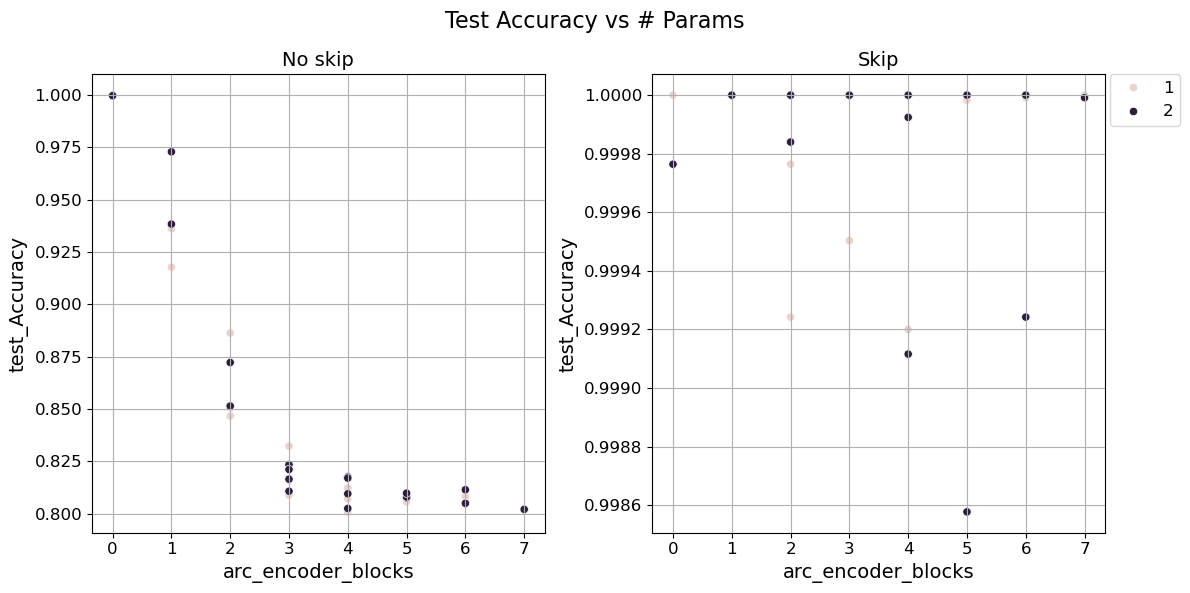

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

xplot = "arc_encoder_blocks"
yplot = "test_Accuracy"
# hue = "arc_latent_volume"
# size = "arc_num_conv"
size = None
hue = "arc_num_conv"
style = None
extra_info = [
    "test_file",
    "arc_num_params",
    "arc_features",
    "arc_encoder_blocks",
    "arc_latent_volume",
    "arc_num_conv",
    "arc_skip",
]

df0 = df.query("arc_skip == 0")
df1 = df.query("arc_skip == 1")

sns.scatterplot(
    data=df0, x=xplot, y=yplot, hue=hue, style=style, ax=ax[0], size=size, legend=False
)
sns.scatterplot(data=df1, x=xplot, y=yplot, hue=hue, style=style, size=size, ax=ax[1])

for a in ax:
    a.grid()
    a.set_xlabel(a.get_xlabel(), fontsize=14)
    a.set_ylabel(a.get_ylabel(), fontsize=14)
    a.tick_params(axis="both", which="major", labelsize=12)

ax[1].legend(
    bbox_to_anchor=(1.01, 1),
    loc=2,
    borderaxespad=0.0,
    fontsize=12,
    title_fontsize=14,
)
fig.suptitle("Test Accuracy vs # Params", fontsize=16)
ax[0].set_title("No skip", fontsize=14)
ax[1].set_title("Skip", fontsize=14)

fig.tight_layout()
plt.show()

In [6]:
df.query("arc_latent_volume == 1024.0")

,run_name,test_file,arc_num_params,arc_features,arc_encoder_blocks,arc_latent_volume,arc_skip,arc_num_conv,train_loss,valid_loss,test_loss,valid_F1,train_F1,test_F1,train_Accuracy,valid_Accuracy,test_Accuracy,train_Accuracy_seq,valid_Accuracy_seq,test_Accuracy_seq
36,paper_based_unet_features-n8-0-n16-1-pool-max-...,test_0.csv,572,"[4, 16]",1,1024.0,1,1,0.001046,0.000372,0.000217,1.000000,0.999996,1.000000,0.999996,1.000000,1.000000,0.997890,1.0,1.00000
37,paper_based_unet_features-n8-0-n16-1-pool-max-...,test_0.csv,524,"[4, 16]",1,1024.0,0,1,0.050898,0.047711,0.048645,0.937847,0.933415,0.935927,0.933535,0.937679,0.936220,0.000000,0.0,0.00000
36,paper_based_unet_features-n8-0-n16-1-pool-max-...,test_0.csv,1508,"[4, 16]",1,1024.0,1,2,0.000509,0.000060,0.000047,1.000000,0.999996,1.000000,0.999996,1.000000,1.000000,0.997890,1.0,1.00000
37,paper_based_unet_features-n8-0-n16-1-pool-max-...,test_0.csv,1460,"[4, 16]",1,1024.0,0,2,0.023104,0.022995,0.025494,0.974640,0.976037,0.972747,0.976179,0.974849,0.972926,0.004747,0.0,0.00431


In [ ]:
df.columns

Index(['run_name', 'train_file', 'arc_features', 'arc_num_params',
       'arc_latent_volume', 'arc_skip', 'train_loss', 'valid_loss',
       'test_loss', 'valid_F1', 'train_F1', 'test_F1', 'train_Accuracy',
       'valid_Accuracy', 'test_Accuracy', 'train_Accuracy_seq',
       'valid_Accuracy_seq', 'test_Accuracy_seq'],
      dtype='object')

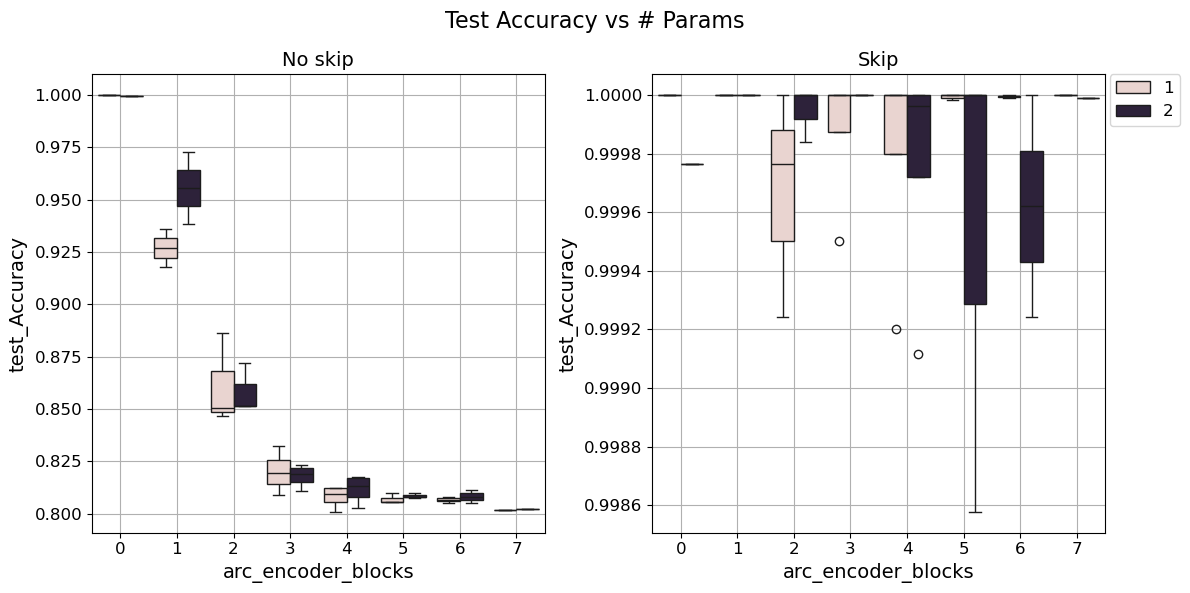

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

xplot = "arc_encoder_blocks"
yplot = "test_Accuracy"
# hue = "arc_latent_volume"
# size = "arc_num_conv"
size = None
hue = "arc_num_conv"
style = None
extra_info = [
    "test_file",
    "arc_num_params",
    "arc_features",
    "arc_encoder_blocks",
    "arc_latent_volume",
    "arc_num_conv",
    "arc_skip",
]

df0 = df.query("arc_skip == 0")
df1 = df.query("arc_skip == 1")

sns.boxplot(data=df0, x=xplot, y=yplot, hue=hue, ax=ax[0], legend=False)
sns.boxplot(data=df1, x=xplot, y=yplot, hue=hue, ax=ax[1])

for a in ax:
    a.grid()
    a.set_xlabel(a.get_xlabel(), fontsize=14)
    a.set_ylabel(a.get_ylabel(), fontsize=14)
    a.tick_params(axis="both", which="major", labelsize=12)

ax[1].legend(
    bbox_to_anchor=(1.01, 1),
    loc=2,
    borderaxespad=0.0,
    fontsize=12,
    title_fontsize=14,
)
fig.suptitle("Test Accuracy vs # Params", fontsize=16)
ax[0].set_title("No skip", fontsize=14)
ax[1].set_title("Skip", fontsize=14)

fig.tight_layout()
plt.show()

/tmp/ipykernel_873760/1253617345.py:38: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipykernel_873760/1253617345.py:38: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



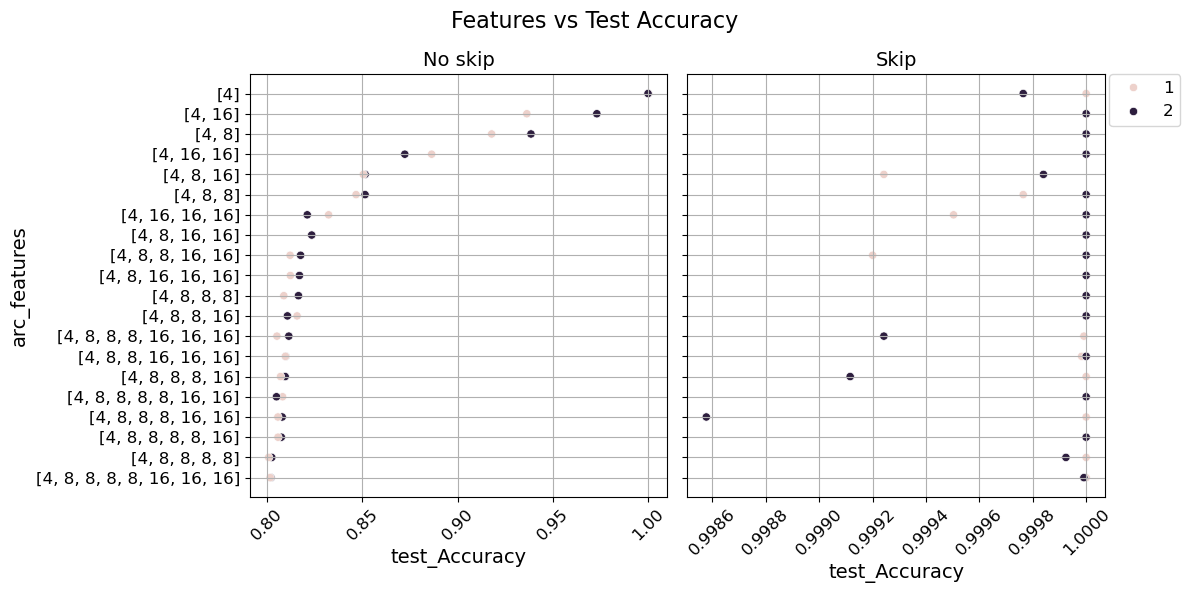

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

yplot = "arc_features"
xplot = "test_Accuracy"
hue = "arc_num_conv"
# size = "arc_num_conv"
extra_info = [
    "test_file",
    "arc_num_params",
    "arc_features",
    "arc_encoder_blocks",
    "arc_latent_volume",
    "arc_num_conv",
    "arc_skip",
]

df0 = df.query("arc_skip == 0")
df1 = df.query("arc_skip == 1")

sns.scatterplot(
    data=df0.sort_values(by="test_Accuracy", ascending=False),
    x=xplot,
    y=yplot,
    hue=hue,
    ax=ax[0],
    legend=False,
)
sns.scatterplot(data=df1, x=xplot, y=yplot, hue=hue, ax=ax[1])

for a in ax:
    a.grid()
    a.set_xlabel(a.get_xlabel(), fontsize=14)
    a.set_ylabel(a.get_ylabel(), fontsize=14)
    a.tick_params(axis="both", which="major", labelsize=12)
    a.set_xticklabels(a.get_xticklabels(), rotation=45)

ax[1].legend(
    bbox_to_anchor=(1.01, 1),
    loc=2,
    borderaxespad=0.0,
    fontsize=12,
    title_fontsize=14,
)
fig.suptitle("Features vs Test Accuracy", fontsize=16)
ax[0].set_title("No skip", fontsize=14)
ax[1].set_title("Skip", fontsize=14)

fig.tight_layout()
plt.show()

/tmp/ipykernel_873760/3115665747.py:38: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipykernel_873760/3115665747.py:38: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



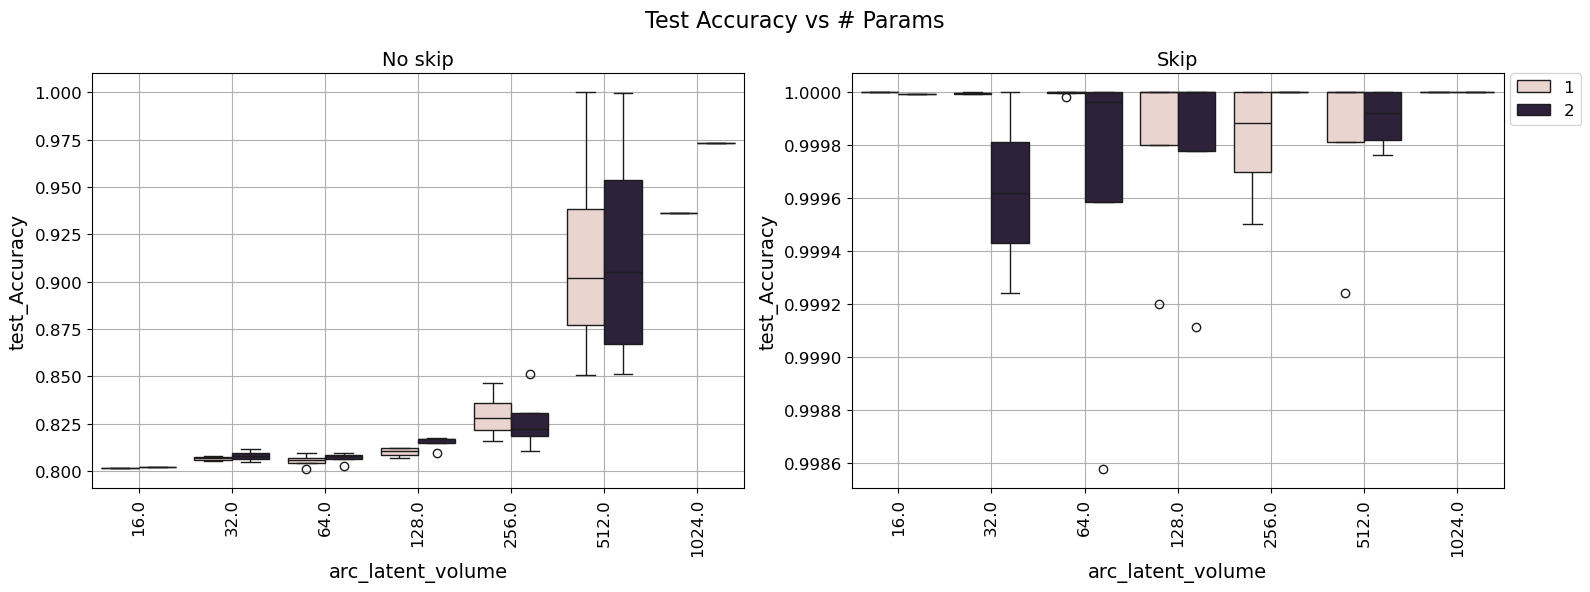

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

xplot = "arc_latent_volume"
yplot = "test_Accuracy"
hue = "arc_num_conv"
# size = "arc_num_conv"
extra_info = [
    "test_file",
    "arc_num_params",
    "arc_features",
    "arc_encoder_blocks",
    "arc_latent_volume",
    "arc_num_conv",
    "arc_skip",
]

df0 = df.query("arc_skip == 0")
df1 = df.query("arc_skip == 1")

sns.boxplot(
    data=df0.sort_values(by="test_Accuracy"),
    x=xplot,
    y=yplot,
    hue=hue,
    ax=ax[0],
    legend=False,
)
sns.boxplot(data=df1, x=xplot, y=yplot, hue=hue, ax=ax[1])

for a in ax:
    a.grid()
    a.set_xlabel(a.get_xlabel(), fontsize=14)
    a.set_ylabel(a.get_ylabel(), fontsize=14)
    a.tick_params(axis="both", which="major", labelsize=12)
    a.set_xticklabels(a.get_xticklabels(), rotation=90)

ax[1].legend(
    bbox_to_anchor=(1.01, 1),
    loc=2,
    borderaxespad=0.0,
    fontsize=12,
    title_fontsize=14,
)
fig.suptitle("Test Accuracy vs # Params", fontsize=16)
ax[0].set_title("No skip", fontsize=14)
ax[1].set_title("Skip", fontsize=14)

fig.tight_layout()
plt.show()